In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

[(0.69227222075649331, 0.092272204803485525, 0.16770473370949396),
 (0.83921569585800171, 0.37647059559822083, 0.30196079611778259),
 (0.95455594273174504, 0.64175319262579378, 0.5057285948126925),
 (0.99215686321258534, 0.85882353782653809, 0.78039216995239269),
 (0.96570549992954036, 0.96724336988785686, 0.96808919836493101),
 (0.81960785388946544, 0.89803922176361084, 0.94117647409439076),
 (0.56647445816619735, 0.76870435826918648, 0.8685121185639324),
 (0.26274511218070995, 0.57647061347961415, 0.76470589637756337),
 (0.12725875369620088, 0.3958477567808299, 0.66874281039424976)]

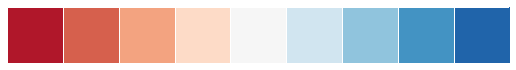

In [3]:
sns.choose_colorbrewer_palette("d")

In [5]:
sns.set()
sns.set_style("white", rc={
    'axes.grid': False,
    'axes.labelcolor': '0.4',
    'axes.edgecolor': '0.8',
    'axes.facecolor': '1.0',
    'text.color': '0.4',
    'xtick.color': '0.4',
    'ytick.color': '0.4',
    'axes.linewidth': 2,
})
palette = sns.color_palette("Spectral_r", 325)
sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.2)

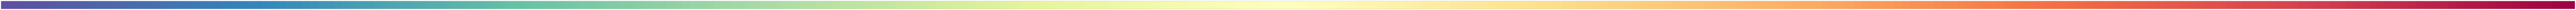

In [6]:
sns.palplot(palette)

In [130]:
data = pd.read_csv("Assets/.logs/elite_fitness 58.csv", header=None, names=["generation", "species", "fitness", "adjusted", "duration"])

In [131]:
df = data.groupby(["generation", "species"])["adjusted"].mean().unstack("species").fillna(0)

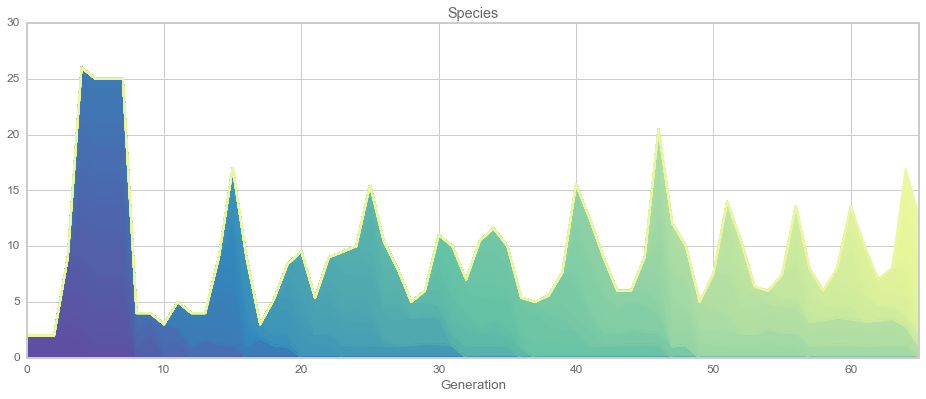

In [132]:
ax = df.plot(kind="area", stacked=True, legend=False, title="Species", figsize=(16, 6), color=palette)
ax.set_xlabel("Generation")

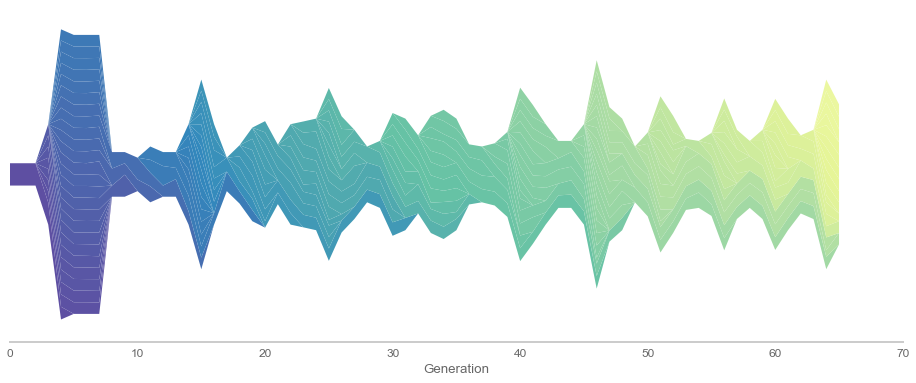

In [133]:
from matplotlib import transforms

X = df.index.values
Y = [df[c] for c in df.columns.values]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)

plt.stackplot(X, *Y, colors=palette, baseline="sym", linewidths=0)
# plt.stackplot(X, *Y, colors=palette, baseline="wiggle", linewidths=0)
# plt.stackplot(X, *Y, colors=palette, baseline="wiggle", linewidths=0)

ax.set_xlabel("Generation")
ax.set_ylabel("Species Size")
ax.get_yaxis().set_visible(False)

sns.despine(left=True, trim=True)

In [118]:
data = pd.read_csv("Assets/.logs/species 58.csv", header=None, names=["generation", "species", "size", "fitness"])

In [119]:
df = data.groupby(["generation", "species"])["size"].first().unstack("species").fillna(0)

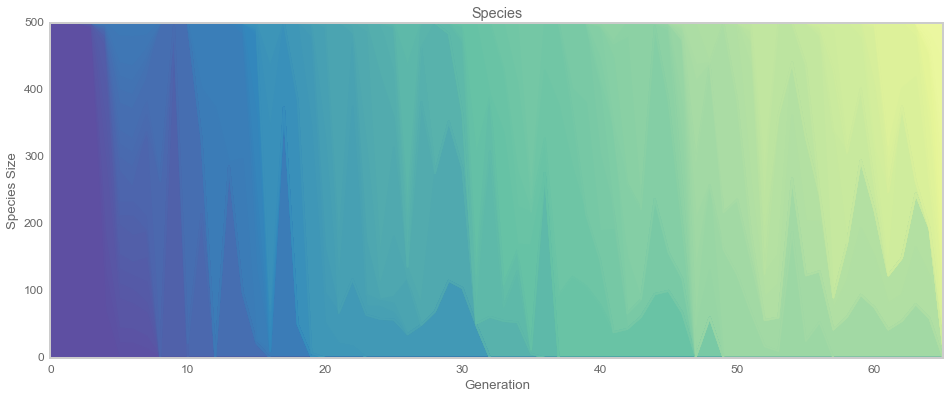

In [120]:
ax = df.plot(kind="area", stacked=True, legend=False, title="Species", figsize=(16, 6), color=palette)
ax.set_xlabel("Generation")
ax.set_ylabel("Species Size")

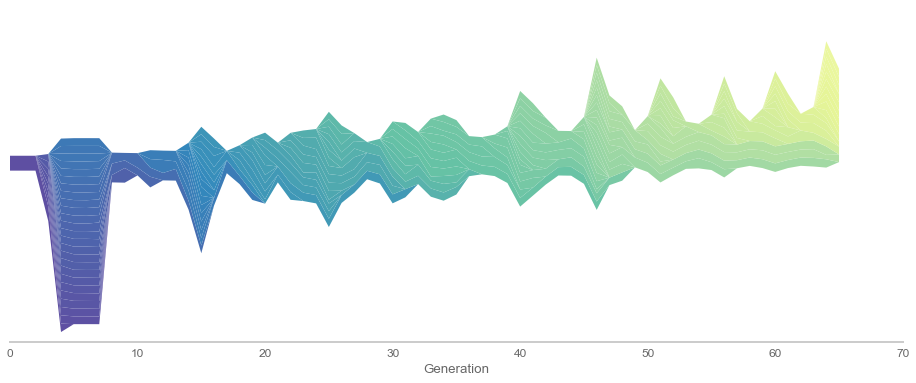

In [129]:
from matplotlib import transforms

X = df.index.values
Y = [df[c] for c in df.columns.values]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)

plt.stackplot(X, *Y, colors=palette, baseline="wiggle", linewidths=0)
# plt.stackplot(X, *Y, colors=palette, baseline="sym", linewidths=0)
# plt.stackplot(X, *Y, colors=palette, baseline="sym", linewidths=0)

ax.set_xlabel("Generation")
ax.set_ylabel("Species Size")
ax.get_yaxis().set_visible(False)

sns.despine(left=True, trim=True)